In [1]:
import pandas as pd
import plotly.express as px

In [2]:
DATA_PATH: str = r"../data/planeta_salud_wellbeing_dataset.csv"
df = pd.read_csv(DATA_PATH)

In [3]:
df.sample(5)

,ciudad,semana,satisfaccion_transporte,espacios_verdes,seguridad_percibida,nivel_estres,actividad_fisica_semanal_horas,calidad_aire,nivel_ruido_db
35,Asunción,4,5,0.56,1,7.6,6.6,69,74
8,Lima,1,3,3.90,3,2.1,3.4,47,66
5,Bogotá,2,2,1.28,1,5.6,3.9,95,76
33,Asunción,2,1,2.28,2,7.9,0.1,55,72
25,Quito,2,3,3.14,3,3.5,9.0,58,63


## Selección efectiva de tipos de gráficas


### Barras: Ciudad x satisfaccion con transporte

In [4]:
transport_df = (
    df.groupby("ciudad", as_index=False)["satisfaccion_transporte"]
    .mean()
    .sort_values("satisfaccion_transporte", ascending=False)
)

fig = px.bar(
    transport_df,
    x="ciudad",
    y="satisfaccion_transporte",
    labels={"satisfaccion_transporte": "Satisfacción promedio", "ciudad": "Ciudad"},
    title="Buenos Aires lidera la lista de ciudades donde sus habitantes se<br>sienten más complacidos con el servicio de Transporte Público",
)

fig.add_annotation(
    text="Información tomada de planeta_salud_wellbeing_dataset.csv",
    xref="paper",
    yref="paper",
    x=0,
    y=-0.4,
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="left",
)

fig.update_traces(textposition="outside")  # mostrar texto fuera de las barras
fig.show()

### Pequenos multiples: Nivel de estres x semana y ciudad

In [5]:
fig = px.line(
    df,
    x="semana",
    y="nivel_estres",
    facet_col="ciudad",
    facet_col_wrap=2,  # numero de columnas
    markers=True,
)

# ocultar todas las etiquetas repetidas
fig.for_each_xaxis(lambda axis: axis.update(title=""))
fig.for_each_yaxis(lambda axis: axis.update(title=""))

fig.add_annotation(  # titulo unificado eje X
    x=0.5, y=-0.1, showarrow=False, text="Semana", xref="paper", yref="paper", yanchor="top"
)

fig.add_annotation(  # titulo unificado eje Y
    x=-0.04,
    y=0.5,
    showarrow=False,
    text="Nivel de estrés",
    xref="paper",
    yref="paper",
    textangle=-90,
    xanchor="left",
)

fig.update_layout(
    height=700,
    width=1000,
    margin=dict(
        l=60,  # margen izquierdo
        r=40,  # margen derecho
        t=100,  # margen superior (deja espacio al título)
        b=80,  # margen inferior
    ),
    title=dict(
        text="Lima y Quito lideran los picos de estrés en la región",
        x=0.5,  # centra el título horizontalmente
        xanchor="center",
        font=dict(size=20),  # tamaño de fuente del título
    ),
)

fig.show()

### Scatter Plot: Espacios verdes x nivel de estrés 

In [6]:
stres_df = df.groupby("ciudad", as_index=False)[["espacios_verdes", "nivel_estres"]].mean()

fig = px.scatter(
    stres_df,
    x="espacios_verdes",
    y="nivel_estres",
    title="Santiago es la ciudad con el promedio de estrés mas elevado teniendo un area de espacios verdes moderada.",
    labels={"espacios_verdes": "Espacios verdes (m²)", "nivel_estres": "Nivel promedio de estrés"},
    hover_data=["ciudad", "espacios_verdes", "nivel_estres"],
    text="ciudad",
)

fig.update_traces(
    textposition="bottom center",
)  # etiquetas de texto debajo de cada punto

fig.add_annotation(
    text="Información tomada de planeta_salud_wellbeing_dataset.csv",
    xref="paper",
    yref="paper",
    x=0,
    y=-0.2,
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="left",
)

fig.show()

### Histograma de calidad de aire

In [7]:
fig = px.histogram(
    df,
    x="calidad_aire",
    title="Distribución de la calidad del aire (AQI)",
    labels={
        "calidad_aire": "Intervalos de calidad del aire (AQI)",
    },
    color_discrete_sequence=["#009688"],
)

fig.update_layout(
    yaxis_title="Cantidad de registros"  # 👈 Título personalizado del eje Y
)

fig.add_annotation(
    text="Información tomada de planeta_salud_wellbeing_dataset.csv",
    xref="paper",
    yref="paper",
    x=0,
    y=-0.25,
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="left",
)

fig.update_layout(bargap=0.1)

fig.show()

<Axes: ylabel='Frequency'>

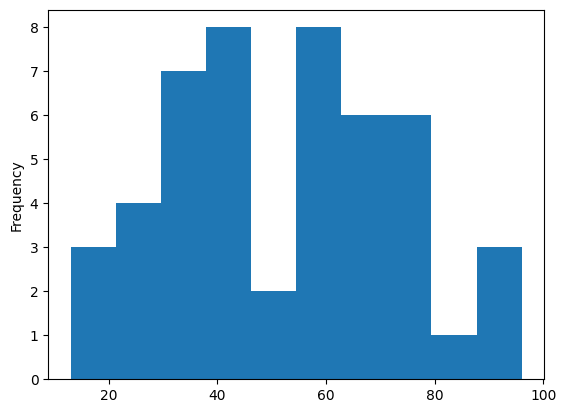

In [8]:
df["calidad_aire"].plot(kind="hist")

### TreeMap

In [9]:
security_df = df.groupby("ciudad", as_index=False)["seguridad_percibida"].mean()

fig = px.treemap(
    security_df,
    path=["ciudad"],
    values="seguridad_percibida",
    color="seguridad_percibida",
    color_continuous_scale="Blues",
    title="Ciudad de México es la ciudad en la cual<br>sus habitantes se sienten mas seguros.",
)

fig.update_layout(height=700, width=700)  # graficar de forma vertical

fig.update_coloraxes(colorbar_title="Seguridad percibida (%)")

fig.show()

## Combinar texto y visualización: uso de títulos, subtítulos y anotaciones efectivas

In [10]:
stres_df = df.groupby("ciudad", as_index=False)[["espacios_verdes", "nivel_estres"]].mean()

fig = px.scatter(
    stres_df,
    x="espacios_verdes",
    y="nivel_estres",
    title="Menos espacio verde, más estrés: una relación visible en las ciudades del sur",
    hover_data=["ciudad", "espacios_verdes", "nivel_estres"],
    color="ciudad",
)

fig.add_annotation(
    hovertext="Caracas presenta un nivel alto de estrés a pesar de un nivel medio de áreas verdes.",
    x=3.095,
    y=5.875,
    bgcolor="white",
    bordercolor="black",
    borderwidth=1,
)  # añadir comentario como tooltip